In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def applyModulationOnDataSignal(name, signal):
  def bpsk(dataSignal):
    Eb = 1
    Tb = 1
    freq = 2
    # dataSignal = 1,2
    return np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*freq*t + np.pi*(1-dataSignal))
  def qpsk(dataSignal):
    Es = 1
    Ts = 1
    freq = 2
    # dataSignal = 1,2,3,4
    return np.sqrt(2*Es/Ts)*np.cos(2*np.pi*freq*t + np.pi*(2*dataSignal -1)/4)
  
  if name == 'bpsk':
    return lambda s: bpsk(signal)
  if name == 'qpsk':
    return lambda s: qpsk(signal)   

def expandDataToSignal(data, symbolPeriod, timeSampling):
  N = len(data)
  timeLength = symbolPeriod*(N)
  print(timeLength)
  time = np.arange(0, timeLength, timeSampling)
  signal = np.zeros((N, int(1/timeSampling)))
  for i in range(N): 
    signal[i,:] += data[i]
  signal = signal.reshape(np.shape(time))
  return time, signal

def makeConstelationSignaling(modulatedSignal, symbolPeriod, timeSampling):
  freq = 2
  N = len(data)
  timeLength = symbolPeriod*(N+1)
  time = np.arange(0, timeLength, timeSampling)
  pSignal = np.sum((modulatedSignal*np.cos(2*np.pi*2*t)).reshape(len(data),int(symbolPeriod/timeSampling)),axis=1)*timeSampling
  qSignal = np.sum((modulatedSignal*np.sin(2*np.pi*2*t)).reshape(len(data),int(symbolPeriod/timeSampling)),axis=1)*timeSampling

  return pSignal, qSignal

8
7.99


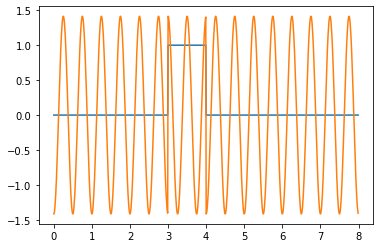

In [3]:
sigSize = 8

data = np.array([np.random.randint(0,2) for i in range(sigSize)])
symbolPeriod = 1 #periodo de duração de cada simbolo
timeSampling = 0.01 #amostragem temporal
modulation = 'bpsk'

t, dataSignal = expandDataToSignal(data, symbolPeriod, timeSampling)
modulatedSignal = applyModulationOnDataSignal(modulation,dataSignal)
plt.plot(t,dataSignal)
plt.plot(t,modulatedSignal(dataSignal))
print(t[-1])

5


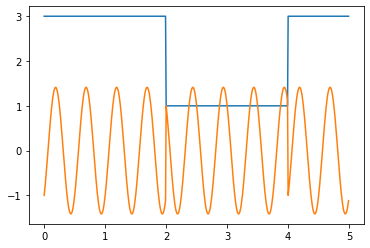

In [28]:
sigSize = 5
data = np.array([np.random.randint(0,4) for i in range(sigSize)])

symbolPeriod = 1
timeSampling = 0.01
modulation = 'qpsk'

t, dataSignal = expandDataToSignal(data, symbolPeriod, timeSampling)
modulatedSignal = applyModulationOnDataSignal(modulation,dataSignal)
plt.plot(t,dataSignal)
plt.plot(t,modulatedSignal(dataSignal))

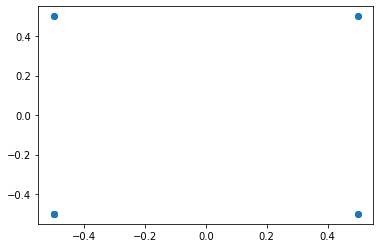

In [5]:
p, q = makeConstelationSignaling(modulatedSignal(t), symbolPeriod, timeSampling)
plt.scatter(p,q)

50000


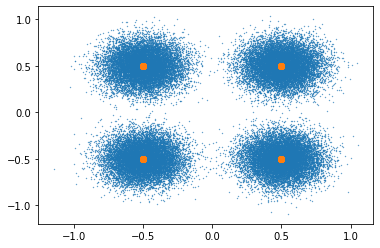

In [36]:
sigSize = 50000
data = np.array([np.random.randint(0,4) for i in range(sigSize)])
# data = np.array([np.random.randint(0,2) for i in range(sigSize)])

symbolPeriod = 1
timeSampling = 0.01
# modulation = 'bpsk'
modulation = 'qpsk'
t, dataSignal = expandDataToSignal(data, symbolPeriod, timeSampling)

N = 2
modulatedSignal = applyModulationOnDataSignal(modulation, dataSignal)
noisyModulatedSignal = lambda t: modulatedSignal(t) + np.array([np.random.randn()*N for i in range(len(t))])

# plt.plot(t,modulatedSignal(t))
# plt.plot(t,noisyModulatedSignal(t))

p, q = makeConstelationSignaling(modulatedSignal(t), symbolPeriod, timeSampling)
pn, qn = makeConstelationSignaling(noisyModulatedSignal(t), symbolPeriod, timeSampling)

plt.scatter(pn,qn, s=1e-1, cmap=[255,0,0])
plt.scatter(p,q)